In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data = np.loadtxt("Blood_fat.csv", delimiter=',')

In [4]:
data

array([[ 84.,  46., 354.],
       [ 73.,  20., 190.],
       [ 65.,  52., 405.],
       [ 70.,  30., 263.],
       [ 76.,  57., 451.],
       [ 69.,  25., 302.],
       [ 63.,  28., 288.],
       [ 72.,  36., 385.],
       [ 79.,  57., 402.],
       [ 75.,  44., 365.],
       [ 27.,  24., 209.],
       [ 89.,  31., 290.],
       [ 65.,  52., 346.],
       [ 57.,  23., 254.],
       [ 59.,  60., 395.],
       [ 69.,  48., 434.],
       [ 60.,  34., 220.],
       [ 79.,  51., 374.],
       [ 75.,  50., 308.],
       [ 82.,  34., 220.],
       [ 59.,  46., 311.],
       [ 67.,  23., 181.],
       [ 85.,  37., 274.],
       [ 55.,  40., 303.],
       [ 63.,  30., 244.]])

In [9]:
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y = a1*x1 + a2*x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

learning_rate = 0.01

gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_descent)
        if step%100 == 0:
            print("Epochs: %.f, RMSE: %.04f, slope a1: %.4f, slope a2: %.4f, intercept b: %.4f"
                  % (step, sess.run(rmse), sess.run(a1),sess.run(a2),sess.run(b)))
        if step == 2000:
            da1 = sess.run(a1)
            da2 = sess.run(a2)
            db = sess.run(b)
            print(da1)
            print(da2)
            print(db)
            print(type(da1))

C:\Users\harmo\AppData\Local\Temp\ipykernel_24460\4081290268.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Epochs: %.f, RMSE: %.04f, slope a1: %.4f, slope a2: %.4f, intercept b: %.4f"


Epochs: 0, RMSE: 586.3051, slope a1: 7.3734, slope a2: 7.6736, intercept b: 80.6803
Epochs: 100, RMSE: 41.3953, slope a1: 0.4367, slope a2: 5.1183, intercept b: 80.5873
Epochs: 200, RMSE: 41.3817, slope a1: 0.3906, slope a2: 5.1990, intercept b: 80.5854
Epochs: 300, RMSE: 41.3816, slope a1: 0.3879, slope a2: 5.2037, intercept b: 80.5836
Epochs: 400, RMSE: 41.3816, slope a1: 0.3878, slope a2: 5.2040, intercept b: 80.5818
Epochs: 500, RMSE: 41.3816, slope a1: 0.3878, slope a2: 5.2040, intercept b: 80.5800
Epochs: 600, RMSE: 41.3816, slope a1: 0.3878, slope a2: 5.2040, intercept b: 80.5783
Epochs: 700, RMSE: 41.3816, slope a1: 0.3878, slope a2: 5.2040, intercept b: 80.5765
Epochs: 800, RMSE: 41.3816, slope a1: 0.3879, slope a2: 5.2040, intercept b: 80.5747
Epochs: 900, RMSE: 41.3816, slope a1: 0.3879, slope a2: 5.2040, intercept b: 80.5729
Epochs: 1000, RMSE: 41.3816, slope a1: 0.3879, slope a2: 5.2040, intercept b: 80.5712
Epochs: 1100, RMSE: 41.3816, slope a1: 0.3879, slope a2: 5.2040, 

In [10]:
calc_y = []

for i in range(25):
    new_y = (da1*x1[i]) + (da2*x2[i]) + db
    calc_y.append(new_y)
    print(new_y)
    

[352.54268361]
[212.9665756]
[376.39366171]
[263.84349428]
[406.6832643]
[237.43480629]
[250.71861545]
[295.84439304]
[407.84753868]
[338.64162186]
[215.93084568]
[276.42135132]
[376.39366171]
[222.36947016]
[415.69806741]
[357.12955033]
[280.77905691]
[376.62282284]
[369.8663377]
[289.31706902]
[342.84039712]
[226.25038476]
[306.09370132]
[310.06331545]
[261.12685406]


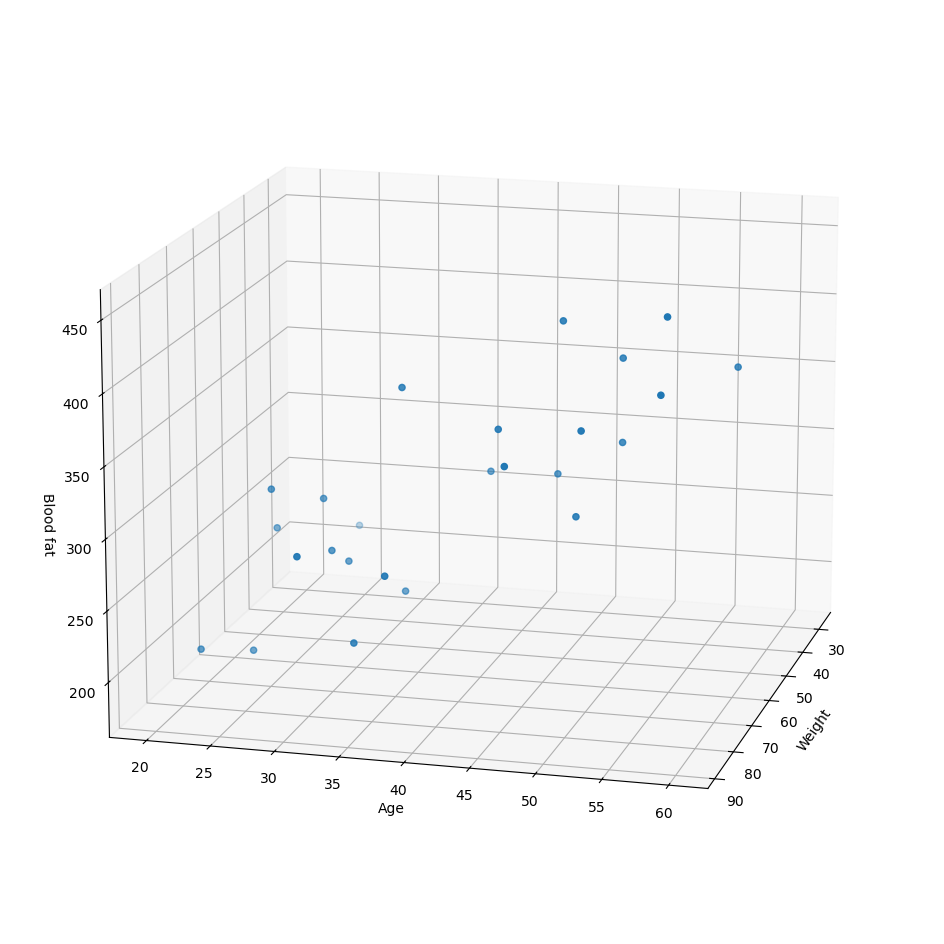

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y_data)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [12]:
bld_fat = da1*75 + da2*45 + db
print(bld_fat)

[343.84574117]
